In [195]:
# -*- coding: utf-8 -*-
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import fftpack

import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
# データ ファイルのパス
PATH = 'Q4149CF2.csv'

In [197]:
# オリジナルの加速度を読み込む。
data = pd.read_csv(PATH, skiprows=6)
data = data.rename(columns={' NS': 'NS'})
print(data.head())

    NS     EW     UD
0  0.0  0.001 -0.002
1  0.0  0.001 -0.000
2  0.0 -0.000 -0.000
3  0.0 -0.003 -0.001
4  0.0 -0.004 -0.002


/Users/m.tomoki/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


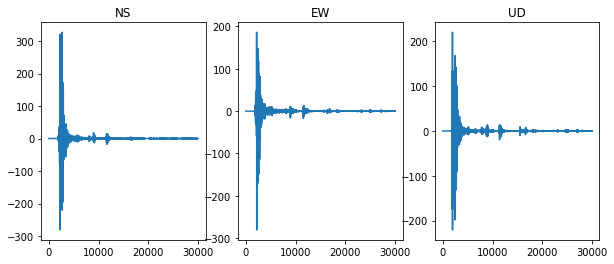

In [198]:
# オリジナルの加速度の波形を描画する。
fig, (ax_NS, ax_EW, ax_UD) = plt.subplots(ncols=3, figsize=(10,4))

ax_NS.plot(data['NS'])
ax_NS.set_title('NS')

ax_EW.plot(data['EW'])
ax_EW.set_title('EW')

ax_UD.plot(data['UD'])
ax_UD.set_title('UD')


fig.show()

In [199]:
# 1. データをフーリエ変換する。
fft_df = pd.concat([pd.Series(fftpack.fft(data[column])) for column in data.columns], axis=1)

fft_df = fft_df.rename(columns={0: 'NS', 1: 'EW', 2: 'UD'})
fft_df.head()

,NS,EW,UD
0,(-338.595+0j),(636.012+0j),(-423.881+0j)
1,(-102.115530626+93.9080210482j),(380.535035533-404.236252291j),(13.0633474373-11.9826668884j)
2,(-14.0436144827+128.94695615j),(7.48742568162-483.171623741j),(0.530560005132-8.46160624027j)
3,(60.2192401727+103.646174263j),(-247.552554827-316.668878864j),(-1.22847144807+7.02888174725j)
4,(100.278072608+49.9704353821j),(-318.258308633-95.4870534841j),(9.07009519702+17.7192361053j)


In [200]:
# フィルターをかける。(図3を参照)
def filter_1(f):
    """周期の効果を表すフィルターです。
    """
    return np.sqrt(1 / f)


def filter_high(f):
    """ハイカットフィルターです。
    """
    y = f * 0.1
    result = (1 + 0.694 * y ** 2 + 0.0557 * y ** 6 + 0.009664 * y ** 8
              + 0.00134 * y ** 10 + 0.000155 * y ** 12)
    return 1 / np.sqrt(result)


def filter_low(f):
    """ローカットフィルターです。
    """
    return np.sqrt(1 - np.exp(- (f / 0.5) ** 3))


filtered_df = filter_low(filter_high(filter_1(fft_df)))

filtered_df.head()

,NS,EW,UD
0,(0.999832295874+0j),(0.999832232649+0j),(0.999832287574+0j)
1,(0.999832328741+6.81445677055e-08j),(0.999832237368-1.83250924363e-08j),(0.999831673691-5.34214837392e-07j)
2,(0.999832266305+1.07070956943e-07j),(0.999832254171-2.89083258216e-08j),(0.999832157855-1.64542883231e-06j)
3,(0.999832196081+1.00804030797e-07j),(0.999832276025-2.73811378157e-08j),(0.999832600214+1.92565548093e-06j)
4,(0.999832142987+5.5645649439e-08j),(0.999832294886-1.20808217395e-08j),(0.999831935494+6.25707871836e-07j)


In [225]:
# 逆フーリエ変換する。
# 逆フーリエ変換すると、虚部が残る可能性があるので、np.real をかぶせる。
ifft_df = pd.concat([pd.Series(np.real(fftpack.ifft(filtered_df[column]))) for column in filtered_df.columns], axis=1)

ifft_df = ifft_df.rename(columns={0: 'NS', 1: 'EW', 2: 'UD'})
ifft_df.head(14)

,NS,EW,UD
0,0.999860,1.465772e+16,221.863779
1,0.000498,-1.170095e+16,-73.018946
2,-0.000723,1.383406e+15,-223.432001
3,0.000532,9.804402e+15,51.972015
4,-0.000067,-1.482450e+16,232.430595
5,-0.000395,1.051888e+16,-39.758572
6,0.000603,4.039061e+14,-230.805260
7,-0.000468,-1.107261e+16,19.084335
8,0.000124,1.477582e+16,233.915066
9,0.000163,-9.183936e+15,-1.306034


In [226]:
# フィルター処理済みの3成分波形をベクトル的に合成する。


# 5. a を求める。 

In [204]:
# 6. 計測震度 I を計算する。

In [190]:
# Iの小数第３位を四捨五入し、小数第２位を切り捨てたものを計測震度として返す。